Author: Kiril Klein

In [2]:
import sys
sys.path.append('../')

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import toolbox as tb
from toolbox import fits, vis
from toolbox import as_toolbox as ast
from toolbox.vis import Color_palette as Color_p
import urllib
from scipy import stats
from toolbox.ExternalFunctions import NLLH

In [4]:
import importlib
_=importlib.reload(vis)

# Problem 2 {.unnumbered}

In [13]:
Data = pd.read_csv(
    "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2017/data/data_exam_prob2.txt",
    sep=r"\s*", header = 0, engine='python')
Data.head(3)

,log(gamma),sig(log(gamma)),pHT,sig(pHT)
0,1.05,0.0,0.052,0.006
1,1.10,0.0,0.047,0.009
2,1.15,0.0,0.059,0.010


In [22]:
#We choose a p-value of 0.01

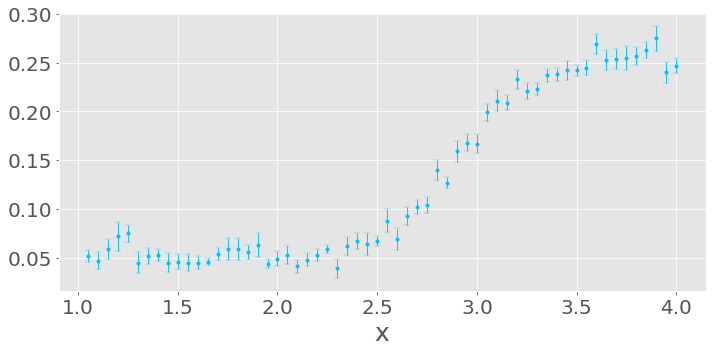

In [64]:
loggamma = Data.iloc[:,0]
pht = Data.iloc[:,2]
spht = Data.iloc[:,3]
fig, ax = vis.nice_plot(loggamma, pht, spht, errorbar=True)

We choose an $\alpha$ of 0.05 as a threshold, i.e. if the p-value is smaller, the hypothesis is rejected.

In [70]:
indices = np.arange(26,34)
def const_func(x,a): return np.ones_like(x)*a
P = []
for i, ind in enumerate(indices):
    x, y, sy = loggamma[:ind], pht[:ind], spht[:ind]
    fig, ax,fdict = fits.chi2_fit_func(x, y, sy, const_func, np.array([0.05]),
                                            kwargs = {'figsize':(12,10), 'show_plot':False})
    P.append(fdict['pval'])
    print(f"pvalue = {fdict['pval']:3.4f}", f" loggamma max = {loggamma[ind-1]:3.3f} ")

pvalue = 0.3815  loggamma max = 2.300 
pvalue = 0.3633  loggamma max = 2.350 
pvalue = 0.2484  loggamma max = 2.400 
pvalue = 0.2446  loggamma max = 2.450 
pvalue = 0.0679  loggamma max = 2.500 
pvalue = 0.0142  loggamma max = 2.550 
pvalue = 0.0121  loggamma max = 2.600 
pvalue = 0.0001  loggamma max = 2.650 


The hypothesis of a constant function holds for a $\log(gamma)\leq2.5$